#### Section 1 - Parameter estimation by optimization

In the first setion we will work with the baseball data. We want to find out **How often do we get no-hitters?** <br>We can download the data from datacamp's website. First let us import the libraries and then we will load the data.

In [1]:
import pandas as pd
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The below code will download the csv file and store it in your current directory. (Assuming its still available at Datacamp's website)

In [2]:
baseball_data_url = 'https://assets.datacamp.com/production/repositories/470/datasets/593c37a3588980e321b126e30873597620ca50b7/mlb_nohitters.csv'

request.urlretrieve(baseball_data_url, 'data/baseball.csv')

('data/baseball.csv', <http.client.HTTPMessage at 0xaba8648>)

Now read the data using pandas.

In [3]:
baseball_df = pd.read_csv('data/baseball.csv')

Lets look at the head of the data.

In [4]:
baseball_df.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


This data contains all the no-hitter innings in the entire baseball history. We need to calculate the time between no-hitter innings. This is simply the difference between the game_numbers.

In [5]:
nohitter_innings = baseball_df['game_number'].diff()[1:]

But we are interested in **games between** no-hitters. So we need to subtract 1 from each game.

In [6]:
nohitter_innings = nohitter_innings - 1

Now lets calculate the mean number of innings.

In [7]:
tau = np.mean(nohitter_innings)

Draw an exponential distribution with parameter tau

In [8]:
inter_nohitter_time = np.random.exponential(tau, 100000)

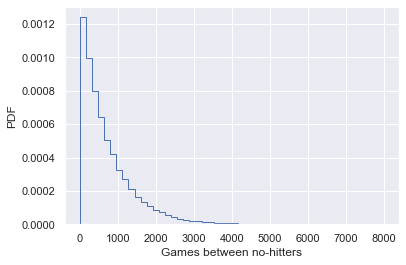

In [9]:
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')


We will recreate our `ecdf()` function that we used in our part 1 course.

In [10]:
def ecdf(data):
    
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

In [11]:
x, y = ecdf(nohitter_innings)

In [12]:
x_theor, y_theor = ecdf(inter_nohitter_time)

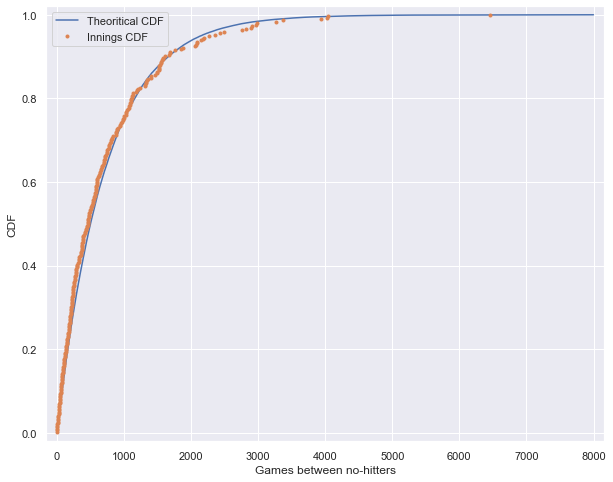

In [13]:
plt.figure(figsize=(10,8))
plt.plot(x_theor,y_theor, label = 'Theoritical CDF')
plt.plot(x,y, marker = '.', linestyle = 'none', label = 'Innings CDF')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend()

How is this parameter (mean of nohitter) innings optimal?

We can start by using the making the `tau` twice the size and then half the size and comparing the ECDF with the data. 

Text(0, 0.5, 'CDF')

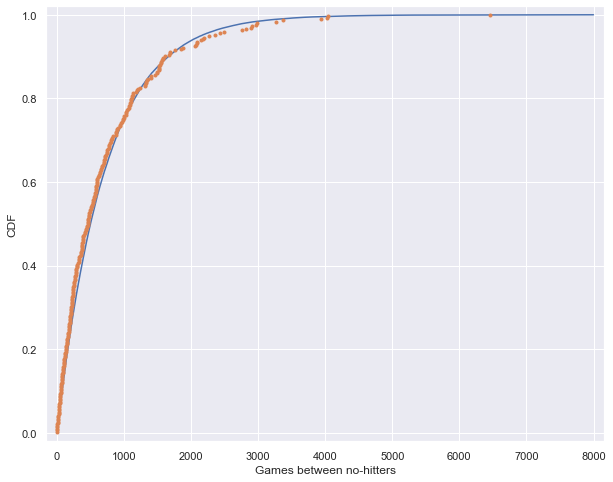

In [14]:
plt.figure(figsize=(10,8))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

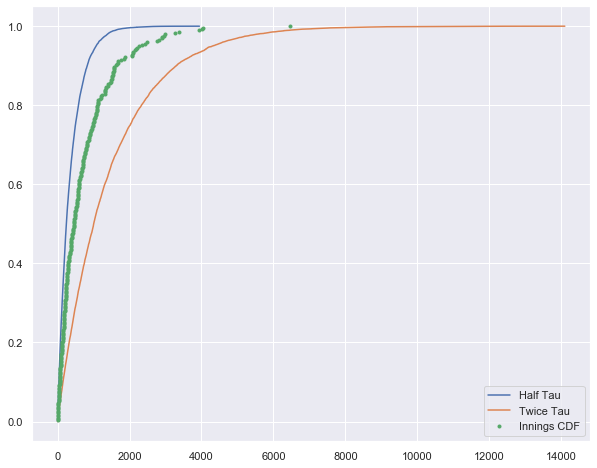

In [15]:
plt.figure(figsize=(10,8))
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label = 'Half Tau')
_ = plt.plot(x_double, y_double, label = 'Twice Tau')
_ = plt.plot(x, y, marker = '.', linestyle = 'none', label = 'Innings CDF')
plt.legend()

We can observe that the new parameter vary from our data.

#### Female literacy and fertility data.

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

Let us load the data. As before we will download the data from Datacamp's website.

In [16]:
fertility_url = "https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv"

In [17]:
request.urlretrieve(fertility_url,'data/fertility.csv')

('data/fertility.csv', <http.client.HTTPMessage at 0xb90be88>)

Load the data

In [18]:
fertility_df = pd.read_csv('data/fertility.csv')

In [19]:
fertility_df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


Lets create a new columns to calcultae the femal illiteracy.

In [20]:
fertility_df['illiteracy'] = np.abs(fertility_df['female literacy'] - 100)
fertility_df.head()

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


Lets use a scatter plot to visualize the illiteracy and fertility rate.

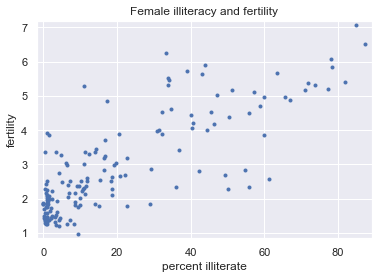

In [21]:
_ = plt.plot(fertility_df['illiteracy'], fertility_df['fertility'], 
            marker = '.', linestyle = 'none')

plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
_ =plt.title('Female illiteracy and fertility')

In [22]:
corr = np.corrcoef(fertility_df['illiteracy'], fertility_df['fertility'])[0,1]

print(f"The correlation between Female illiteracy and fertility is {corr}")

The correlation between Female illiteracy and fertility is 0.8041324026815344


We can calculate the regression parameter using both numpy and scipy packages.

In [23]:
slope, intercept = np.polyfit(fertility_df['illiteracy'], fertility_df['fertility'], 1)

In [24]:
slope

0.04979854809063423

In [25]:
intercept

1.888050610636557

In [26]:
from scipy.stats import linregress

In [27]:
slope, intercept, correlation,_, _ = linregress(x=fertility_df['illiteracy'], y = fertility_df['fertility'])

In [28]:
print(slope)
print(intercept)
print(correlation)


0.0497985480906342
1.8880506106365569
0.8041324026815342


We can also plot the regression plot.

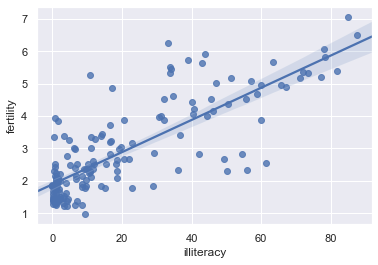

In [29]:
sns.regplot(fertility_df['illiteracy'], fertility_df['fertility'])

#### Section 2 - Bootstrap confidence intervals

Visualizing bootstrap samples

We will use the annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015.

In [30]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])


Lets generate a Bootstrap sample 

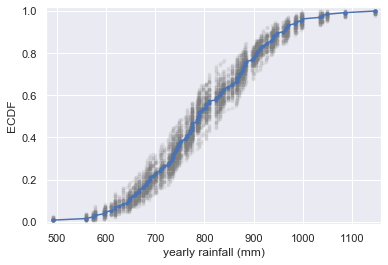

In [31]:
for i in np.arange(50):
    
    
    bs_sample = np.random.choice(rainfall, size = len(rainfall))
    
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'gray', alpha = 0.1)
    
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

We can visualize the blue line is our original data, and the gray points are the bootstrap samples.

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data))

In [32]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [33]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

10.510549150506188
10.55443163484588


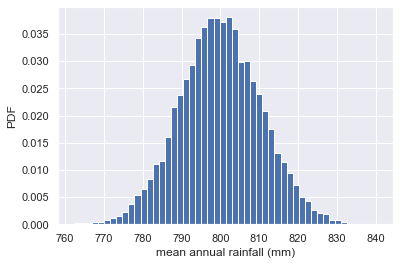

In [34]:
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

The histogram appears to be normally distrbuted. We can use this to calculate our 95% confidence intervals as shown below.

In [35]:
ci_95 = np.percentile(bs_replicates, q = [0.025,0.975])

print(f"The 95% confidence interval of the rainfall data is is {ci_95} mm/year.")

The 95% confidence interval of the rainfall data is is [763.35394098 775.7618468 ] mm/year.


Bootstrap replicates of other statistics. In this exercise, we generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

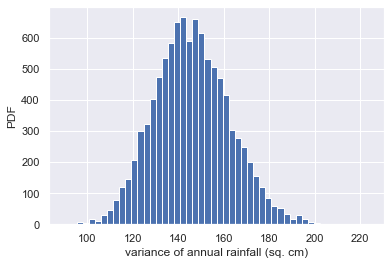

In [36]:
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ
. Plot a histogram of your replicates and report a 95% confidence interval.

The 95% confidence interval for games with no hitters is [627.15682594 816.16774744].


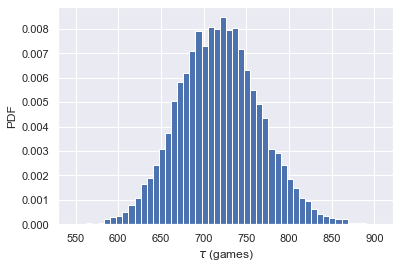

In [37]:
bs_replicates = draw_bs_reps(nohitter_innings, np.mean, size=10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(f"The 95% confidence interval for games with no hitters is {conf_int}.")

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Section 3 - Hypothesis Testing

Generating a permutation sample

Given two data sets, the below function will generate a permutation sample.

In [38]:
def generate_permutation_sample(data1, data2):
    
    '''Given two data sets, this function will generate a permutation sample.'''
    
    data = np.concatenate((data1, data2))
    
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2
    

Visualize the permuted sample data on the rainfall in June and November recorded by Sheffield Weather station.

In [39]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

To help see how permutation sampling works, in this code we will generate permutation samples and look at them graphically. 

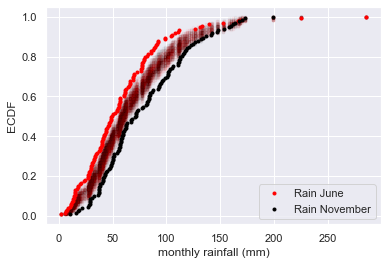

In [40]:
for _ in range(50):
    
    perm_sample_1, perm_sample_2 = generate_permutation_sample(rain_june, rain_november)
    
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.plot(x_1,y_1, marker = '.', linestyle = 'none', color = 'red', alpha = 0.02,)
    
    _ = plt.plot(x_2,y_2, marker = '.', linestyle = 'none', color = 'black', alpha = 0.02)
    
    
# Plot the ECDF of the original data

x_1, y_1 = ecdf(rain_june)

x_2, y_2 = ecdf(rain_november)

_ = plt.plot(x_1,y_1, marker = '.', linestyle = 'none', color = 'red', label = 'Rain June')
_ = plt.plot(x_2,y_2, marker = '.', linestyle = 'none', color = 'black', label = 'Rain November')
_ = plt.legend()
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
    
    

The below function is used to generate permutation replicates. 

In [41]:
def draw_perm_reps(data1, data2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = generate_permutation_sample(data1, data2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

We will use the permutation replicates on a new dataset.<br>
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data.

We will download the data from datacamp's website.

In [42]:
frog_url = 'https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv'
request.urlretrieve(frog_url, 'data/frog.csv')

('data/frog.csv', <http.client.HTTPMessage at 0xbd85a08>)

The data contains some information in the first 14 rows so we will skip those.

In [43]:
frog_df = pd.read_csv('data/frog.csv', skiprows=14)

Lets see the first few rows.

In [44]:
frog_df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


We are interested in the `ID` `II & IV`. So lets filter those two groups.

In [45]:
frog_df = frog_df[(frog_df['ID'] == 'II') | (frog_df['ID'] == 'IV')]

Lets look at that the swarmplot.

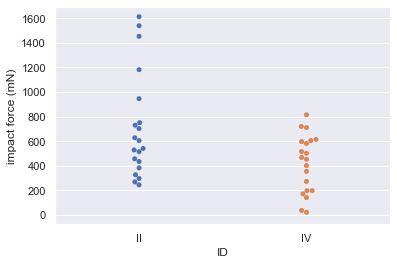

In [46]:
sns.swarmplot(x='ID', y = 'impact force (mN)', data = frog_df)

We can observe the mean impact force for all the different frog groups.

In [47]:
frog_df.groupby('ID').mean()['impact force (mN)']

ID
II    707.35
IV    419.10
Name: impact force (mN), dtype: float64

The average strike force of Frog `II` was 0.71 Newtons (N), and that of Frog `IV` was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. We will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

Lets call the two groups `force_a` and `force_b`, and assign the relevant data.

In [48]:
force_a = frog_df[frog_df['ID'] == 'II']['impact force (mN)'].values / 1000

In [49]:
force_a

array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

In [50]:
force_b = frog_df[frog_df['ID'] == 'IV']['impact force (mN)'].values / 1000

In [51]:
force_b

array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

Finding the p-value.

In [52]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0055


#### A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and we want to see if Frog B and Frog C have similar impact forces. Lets assume, we do not have Frog C's impact forces available, but we know they have a mean of 0.55 N. Because we don't have the original data, we cannot do a permutation test, and we cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. We will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, we will take the mean as our test statistic. Remember, our goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. We first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [53]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

In [54]:
translated_force_b

array([0.3029, 0.2729, 0.1679, 0.5839, 0.4859, 0.1529, 0.6329, 0.4039,
       0.8509, 0.7129, 0.3289, 0.3289, 0.7279, 0.6469, 0.9459, 0.5329,
       0.7359, 0.8419, 0.7449, 0.5989])

In [55]:
# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

In [56]:
# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

In [57]:
print(f"p = {p}")

p = 0.0061


#### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [58]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a, force_b))

In [59]:
forces_concat

array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

In [60]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)


In [61]:
mean_force

0.563225

In [62]:
# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

In [63]:
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

In [64]:
# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0043


#### Hypothesis test examples

#### The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, we will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. We will use the fraction of Democrats voting in favor as our test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [65]:
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

In [66]:
def frac_yea_dems(dems,rep):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

In [67]:
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

In [68]:
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0
